<a href="https://colab.research.google.com/github/atanasvasilevjourney/Data/blob/master/NYC%20Cab%20Taxi%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NYC Taxi Data Analysis

Objectives:


Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, pearsonr, linregress

In [5]:
df = pd.read_csv('ny_subsample.csv', nrows=100000)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [6]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
99995,2,2015-01-21 18:16:49,2015-01-21 18:21:27,5,0.77,-73.986488,40.740021,1,N,-73.988098,40.732056,1,5.5,1.0,0.5,1.46,0.0,0.3,8.76
99996,2,2015-01-21 18:16:49,2015-01-21 19:11:10,1,18.49,-74.003777,40.731682,2,N,-73.783485,40.643738,1,52.0,0.0,0.5,5.00,0.0,0.3,57.80
99997,2,2015-01-21 18:16:49,2015-01-21 18:26:51,3,1.37,-74.007477,40.708118,1,N,-74.009270,40.718620,1,8.0,1.0,0.5,0.50,0.0,0.3,10.30
99998,2,2015-01-21 18:16:50,2015-01-21 19:28:34,5,18.76,-73.866737,40.770859,1,N,-73.977158,40.596611,2,58.5,1.0,0.5,0.00,0.0,0.3,60.30
99999,2,2015-01-21 18:16:50,2015-01-21 18:38:15,1,2.99,-73.996353,40.725224,1,N,-73.981247,40.759380,2,15.0,1.0,0.5,0.00,0.0,0.3,16.80


In [7]:
df.shape

(100000, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RateCodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [9]:
np.random.seed(42)

In [10]:
chunksize = 100000
sample = []
for chunk in pd.read_csv("ny_subsample.csv", chunksize=chunksize):
  sample.append(chunk.sample(frac=0.1))
df = pd.concat(sample)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
75721,1,2015-01-29 11:23:06,2015-01-29 11:50:34,1,3.10,-73.985901,40.747017,1,N,-73.959961,40.779484,1,18.0,0.0,0.5,3.75,0.0,0.3,22.55
80184,1,2015-01-13 06:08:45,2015-01-13 06:13:17,1,0.70,-74.005058,40.747982,1,N,-73.995186,40.749844,1,5.5,0.0,0.5,1.57,0.0,0.3,7.87
19864,1,2015-01-22 12:29:44,2015-01-22 12:51:27,1,2.30,-73.985298,40.738716,1,N,-73.993935,40.761669,1,15.0,0.0,0.5,3.16,0.0,0.3,18.96
76699,2,2015-01-03 13:19:47,2015-01-03 13:26:06,2,1.17,-73.986336,40.752472,1,N,-73.972511,40.756588,2,6.5,0.0,0.5,0.00,0.0,0.3,7.30
92991,1,2015-01-20 12:19:21,2015-01-20 12:28:26,1,1.40,-73.991486,40.750259,1,N,-73.996628,40.732410,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80


Cleaning data

In [11]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.523000,1.67390,2.728543,-72.635584,40.013802,1.033900,-72.687644,40.042989,1.383400,11.776037,0.322002,0.497500,1.543975,0.242294,0.284160,14.681588
std,0.499496,1.33054,3.344976,9.862330,5.433034,0.267877,9.673220,5.328949,0.496819,10.018784,0.375205,0.035971,2.167677,1.245480,0.067094,12.171948
min,1.000000,0.00000,0.000000,-74.186302,0.000000,1.000000,-74.186302,0.000000,1.000000,-21.500000,-0.500000,-0.500000,0.000000,0.000000,0.000000,-21.800000
25%,1.000000,1.00000,0.990000,-73.991615,40.735802,1.000000,-73.991167,40.734798,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.150000
50%,2.000000,1.00000,1.600000,-73.981445,40.753084,1.000000,-73.979805,40.754047,1.000000,9.000000,0.000000,0.500000,1.050000,0.000000,0.300000,11.000000
75%,2.000000,2.00000,2.930000,-73.965935,40.767730,1.000000,-73.962967,40.768509,2.000000,13.275000,0.500000,0.500000,2.072500,0.000000,0.300000,16.300000
max,2.000000,6.00000,34.200000,0.000000,40.880825,5.000000,0.000000,41.035725,4.000000,175.000000,1.000000,0.500000,26.050000,19.500000,0.300000,175.300000


In [12]:
print(df['trip_distance'].sort_values(ascending=False))

24505    34.20
14644    33.60
34170    33.14
99151    30.23
90343    29.00
         ...  
60307     0.00
9138      0.00
24413     0.00
19803     0.00
78759     0.00
Name: trip_distance, Length: 10000, dtype: float64


In [13]:
df = df[
    (df['trip_distance'] > 0) & (df['trip_distance'] < 100) &
    (df['fare_amount'] > 0) & (df['fare_amount'] < 100) &
    (df['tip_amount'] >= 0)
]

Hypothesis Testing
T-Test: Do rides with many passengers have higher fares?

H0 - Rides with many passenger don't have higher fees
H1 - Rides with many passenger have higher fees

T-test - testing with mean values

alpha =  0.05

p-value < 0.05 -> Reject H0, Accept H1
p-value > 0.05 -> Accept H0, Reject H1

In [14]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000
mean,1.523455,1.677572,2.735683,-72.686398,40.041751,1.026173,-72.790873,40.099740,1.380713,11.669966,0.322430,0.498490,1.532718,0.240038,0.284236,14.563662
std,0.499475,1.333545,3.308782,9.677288,5.331092,0.206897,9.284139,5.114595,0.492585,9.285095,0.375057,0.027437,2.106527,1.238873,0.066941,11.480935
min,1.000000,0.000000,0.010000,-74.186302,0.000000,1.000000,-74.186302,0.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000
25%,1.000000,1.000000,1.000000,-73.991644,40.735833,1.000000,-73.991188,40.734873,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.160000
50%,2.000000,1.000000,1.600000,-73.981464,40.753075,1.000000,-73.979843,40.754055,1.000000,9.000000,0.000000,0.500000,1.060000,0.000000,0.300000,11.100000
75%,2.000000,2.000000,2.950000,-73.966042,40.767761,1.000000,-73.963158,40.768526,2.000000,13.000000,0.500000,0.500000,2.080000,0.000000,0.300000,16.260000
max,2.000000,6.000000,33.600000,0.000000,40.880825,5.000000,0.000000,40.955090,4.000000,79.000000,1.000000,0.500000,25.000000,19.500000,0.300000,113.180000


In [15]:
df = df[df['passenger_count'] <= 6]

Sampling Subsets for Lower fees and Higher fees

In [16]:
lower = df[df['passenger_count'] <= 2]['fare_amount']
print(lower)

75721    18.0
80184     5.5
19864    15.0
76699     6.5
92991     8.0
         ... 
48808     5.0
30151     5.5
93194     4.5
73199     8.0
74479    52.0
Name: fare_amount, Length: 8454, dtype: float64


In [17]:
higher = df[df['passenger_count'] >= 5]['fare_amount']
print(higher)

50074     8.5
92731     7.0
84936    10.5
25330     6.0
66598     8.0
         ... 
77636     6.0
49787     8.0
51620    11.0
5784      5.0
5002     12.5
Name: fare_amount, Length: 900, dtype: float64


In [18]:
from scipy.stats import ttest_ind

alpha = 0.05
result = ttest_ind(lower, higher)

print(f"T-statistic: {result.statistic:.3f}")
print(f"p-value: {result.pvalue:.4f}")
print(f"Degrees of freedom: {result.df:.0f}")

if result.pvalue < alpha:
  print("Rejected Null Hypothesis. Acceped Alternative hypothesis.Rides with many passenger don't have higher fees")
else:
  print("Accepted Null Hypothesis. Rejected Alternative hypothesis.Rides with many passenger have higher fees")


T-statistic: -1.833
p-value: 0.0668
Degrees of freedom: 9352
Accepted Null Hypothesis. Rejected Alternative hypothesis.Rides with many passenger have higher fees


 Z-test (approximate): Do tips differ between day and night?

 H0: Mean tips are equal between day and night
 H1: Mean tips differ

In [19]:
print(df['tpep_pickup_datetime'])
df['tpep_pickup_datetime'].info()

75721    2015-01-29 11:23:06
80184    2015-01-13 06:08:45
19864    2015-01-22 12:29:44
76699    2015-01-03 13:19:47
92991    2015-01-20 12:19:21
                ...         
5002     2015-01-11 01:16:43
30151    2015-01-15 19:35:39
93194    2015-01-23 16:51:53
73199    2015-01-05 22:02:06
74479    2015-01-19 09:10:23
Name: tpep_pickup_datetime, Length: 9934, dtype: object
<class 'pandas.core.series.Series'>
Index: 9934 entries, 75721 to 74479
Series name: tpep_pickup_datetime
Non-Null Count  Dtype 
--------------  ----- 
9934 non-null   object
dtypes: object(1)
memory usage: 155.2+ KB


In [20]:
df['hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
#sampling
day_tips = df[df['hour'] < 18]['tip_amount']
night_tips = df[df['hour'] >= 18]['tip_amount']

Z - test

In [21]:
from statsmodels.stats.weightstats import ztest

alpha = 0.05

z_stat, p_val = ztest(day_tips, night_tips)
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_val:.4f}")

Z-statistic: -2.744
P-value: 0.0061


In [22]:
if p_val < alpha:
  print("Rejected Null Hypothesis. Acceped Alternative hypothesis. Mean tips differ")
else:
  print("Accepted Null Hypothesis. Rejected Alternative hypothesis. Mean tips are equal")

Rejected Null Hypothesis. Acceped Alternative hypothesis. Mean tips differ


In [23]:
day_tips_mean = day_tips.mean()
night_tips_mean = night_tips.mean()
print(f"Mean tips during day: {day_tips_mean:.2f}")
print(f"Mean tips during night: {night_tips_mean:.2f}")

Mean tips during day: 1.49
Mean tips during night: 1.61


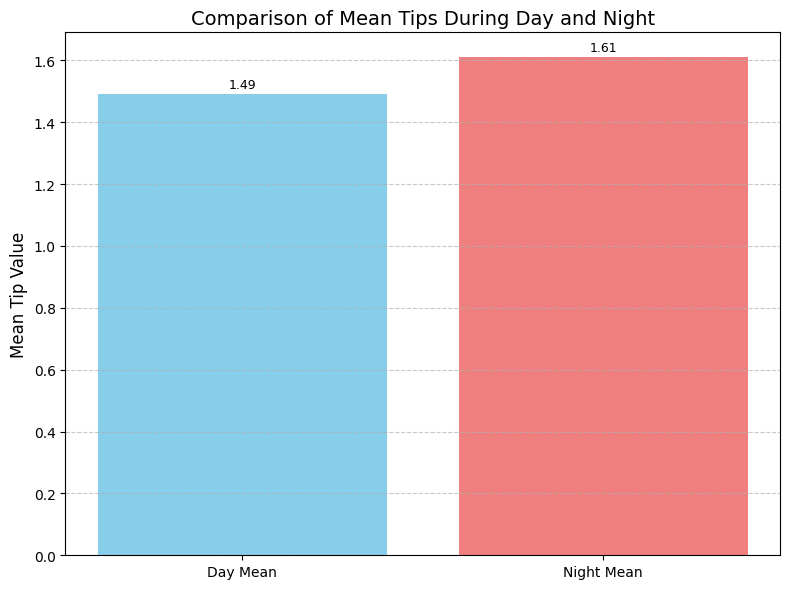

In [24]:
day_mean = 1.49
night_mean = 1.61
labels = ['Day Mean', 'Night Mean']
means = [day_mean, night_mean]
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, means, color=['skyblue', 'lightcoral'])

# Add labels and title
plt.ylabel('Mean Tip Value', fontsize=12)
plt.title('Comparison of Mean Tips During Day and Night', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=9)

# Add a horizontal line at y=0 for better visual reference
plt.axhline(0, color='black', linewidth=0.5)

# Improve layout
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Chi-square Test: Is tipping related to passenger count?

h0 - Tipping related to passenger count

In [25]:
df['tipped_or_not'] = df['tip_amount'] > 0
print(df['tipped_or_not'])

75721     True
80184     True
19864     True
76699    False
92991    False
         ...  
5002      True
30151    False
93194     True
73199     True
74479     True
Name: tipped_or_not, Length: 9934, dtype: bool


In [26]:
contingency_table = pd.crosstab(df['passenger_count'], df['tipped_or_not'])
print(contingency_table)

tipped_or_not    False  True 
passenger_count              
0                    3      4
1                 2751   4251
2                  604    841
3                  177    217
4                  101     85
5                  193    360
6                  127    220


In [27]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.3f}")
print(f"P-value: {p:.10f}")
print(f"Degrees of freedom: {dof}")

Chi-square statistic: 30.859
P-value: 0.0000269677
Degrees of freedom: 6


In [28]:
if p_val < alpha:
  print("Rejected Null Hypothesis. Acceped Alternative hypothesis. Tipping related to passenger count")
else:
  print("Accepted Null Hypothesis. Rejected Alternative hypothesis. Tipping not related to passenger count")

Rejected Null Hypothesis. Acceped Alternative hypothesis. Tipping related to passenger count


Correlation Matrix
  

In [29]:
import scipy.stats as pearsonr

In [30]:
from scipy.stats import pearsonr
x = df['trip_distance']
y = df['fare_amount']


pearsonr(x,y)

PearsonRResult(statistic=np.float64(0.9590938086972759), pvalue=np.float64(0.0))

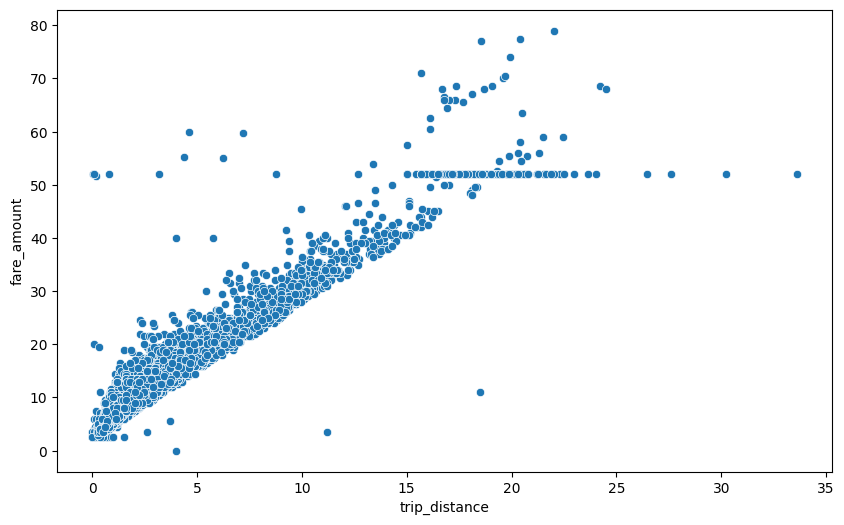

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['trip_distance'], y=df['fare_amount'], data=df)
plt.show()



<Figure size 1000x600 with 0 Axes>

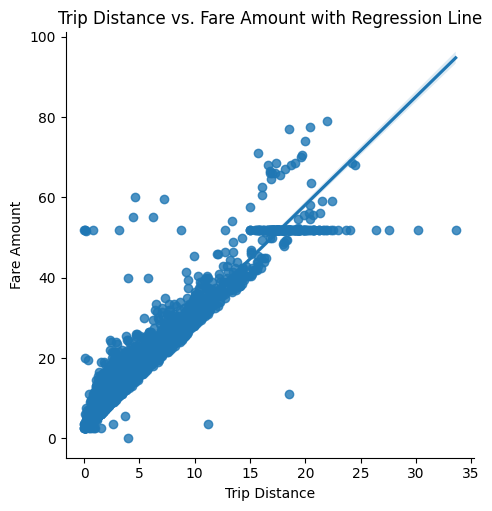

In [32]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='trip_distance', y='fare_amount', data=df)
plt.title('Trip Distance vs. Fare Amount with Regression Line')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

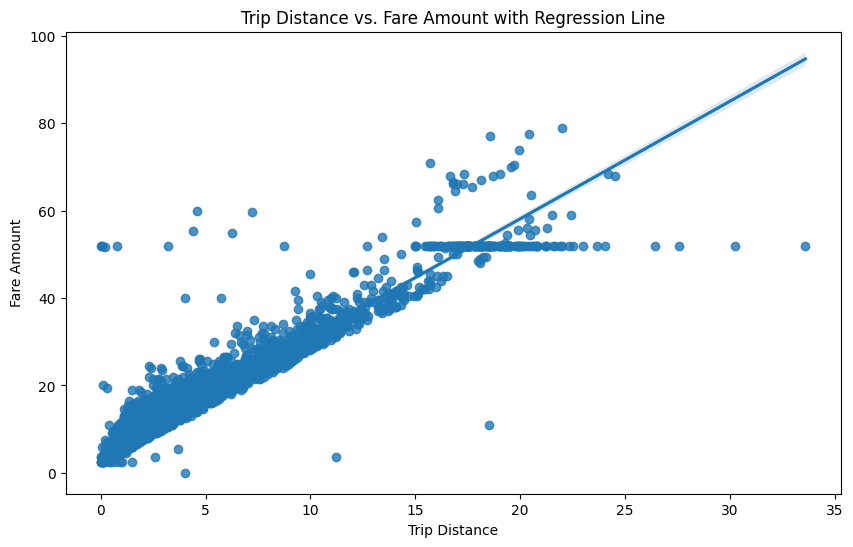

In [33]:
plt.figure(figsize=(10, 6))
sns.regplot(x='trip_distance', y='fare_amount', data=df)
plt.title('Trip Distance vs. Fare Amount with Regression Line')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

In [34]:
x1 = df['fare_amount']
y1 = df['tip_amount']

pearsonr(x1,y1)

PearsonRResult(statistic=np.float64(0.6040570194687815), pvalue=np.float64(0.0))

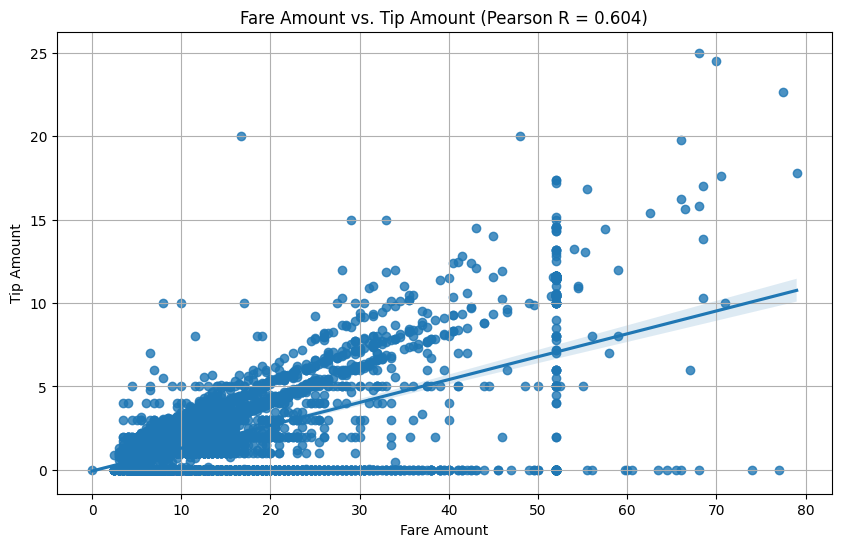

In [35]:
plt.figure(figsize=(10, 6))
sns.regplot(x='fare_amount', y='tip_amount', data=df)
plt.title(f'Fare Amount vs. Tip Amount (Pearson R = {0.604:.3f})')
plt.xlabel('Fare Amount')
plt.ylabel('Tip Amount')
plt.grid(True)
plt.show()

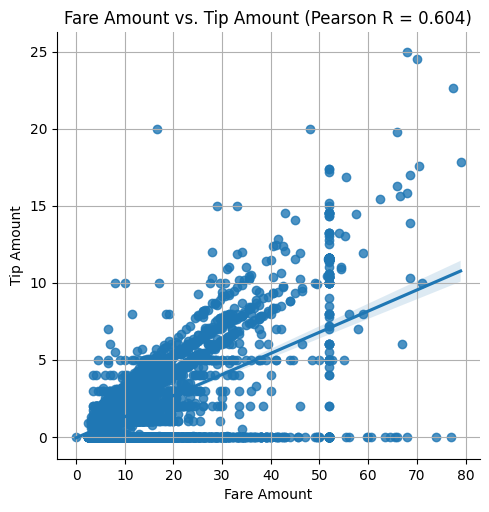

In [36]:
sns.lmplot(x='fare_amount', y='tip_amount', data=df)
plt.title(f'Fare Amount vs. Tip Amount (Pearson R = {0.604:.3f})')
plt.xlabel('Fare Amount')
plt.ylabel('Tip Amount')
plt.grid(True)
plt.show()

In [37]:
correlate_values = ['trip_distance' , 'tip_amount', 'fare_amount', 'passenger_count']
correlate_df = df[correlate_values]
correlate_df.corr()

,trip_distance,tip_amount,fare_amount,passenger_count
trip_distance,1.000000,0.583376,0.959094,0.026321
tip_amount,0.583376,1.000000,0.604057,0.007060
fare_amount,0.959094,0.604057,1.000000,0.023723
passenger_count,0.026321,0.007060,0.023723,1.000000


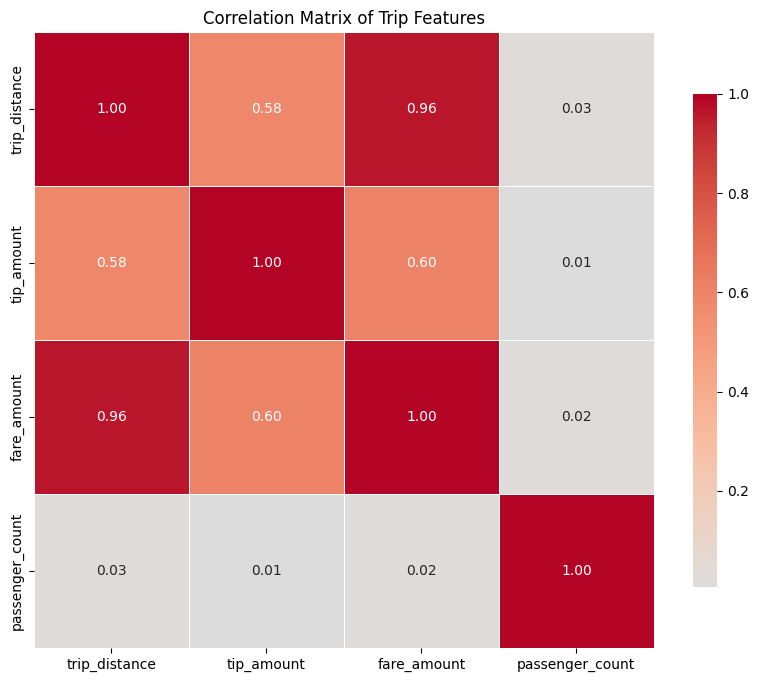

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlate_df.corr(),
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title("Correlation Matrix of Trip Features")
plt.show()

Linear Regression


Slope: 2.691
Intercept: 4.307
R-squared: 0.920
P-value: 0.000
Standard error of the slope: 0.008

Interpretation:
- **Slope (2.691):** For every one-unit increase in 'trip_distance', the 'fare_amount' is predicted to increase by approximately $2.691, on average.
- **Intercept (4.307):** When the 'trip_distance' is zero, the predicted 'fare_amount' is approximately $4.307. While a trip distance of zero is possible, this intercept might not have a strong practical interpretation in most real-world scenarios.
- **R-squared (0.920):** Approximately 92.0% of the variance in 'fare_amount' can be explained by the linear relationship with 'trip_distance'. This indicates a strong positive linear relationship.
- **P-value (0.000):** The very low p-value suggests that the correlation between 'trip_distance' and 'fare_amount' is statistically significant, and the slope is significantly different from zero.
- **Standard error of the slope (0.008):** This value estimates the standard deviation of th

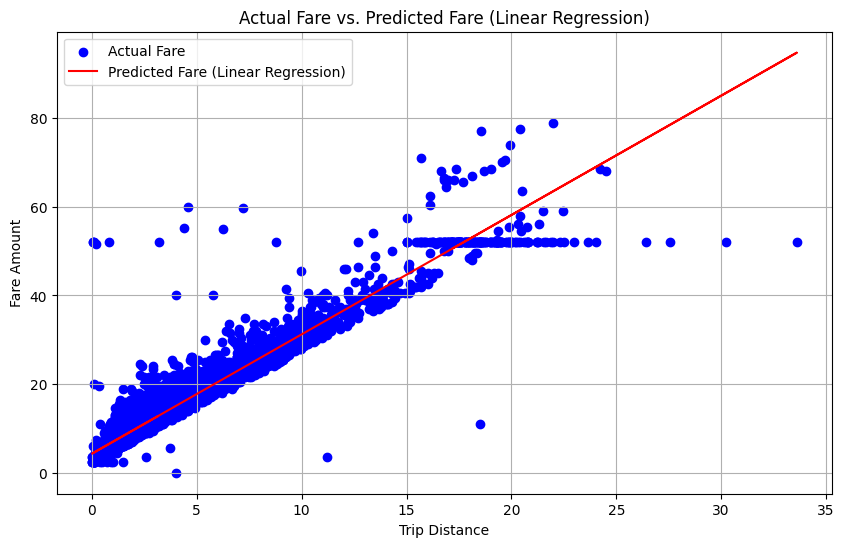

In [39]:
from scipy.stats import linregress

x2 = df['trip_distance']
y2 = df['fare_amount']

linregress(x2, y2)

slope, intercept, r_value, p_value, std_err = linregress(x, y)
r_squared = r_value**2

print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"R-squared: {r_squared:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Standard error of the slope: {std_err:.3f}")

print("\nInterpretation:")
print(f"- **Slope ({slope:.3f}):** For every one-unit increase in 'trip_distance', the 'fare_amount' is predicted to increase by approximately ${slope:.3f}, on average.")
print(f"- **Intercept ({intercept:.3f}):** When the 'trip_distance' is zero, the predicted 'fare_amount' is approximately ${intercept:.3f}. While a trip distance of zero is possible, this intercept might not have a strong practical interpretation in most real-world scenarios.")
print(f"- **R-squared ({r_squared:.3f}):** Approximately {r_squared*100:.1f}% of the variance in 'fare_amount' can be explained by the linear relationship with 'trip_distance'. This indicates a strong positive linear relationship.")
print(f"- **P-value ({p_value:.3f}):** The very low p-value suggests that the correlation between 'trip_distance' and 'fare_amount' is statistically significant, and the slope is significantly different from zero.")
print(f"- **Standard error of the slope ({std_err:.3f}):** This value estimates the standard deviation of the slope coefficient. It provides a measure of the precision of the estimated slope.")

# Plot actual vs. predicted values
predicted_fare = slope * x + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual Fare')
plt.plot(x, predicted_fare, color='red', label='Predicted Fare (Linear Regression)')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Actual Fare vs. Predicted Fare (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [45]:

x3 = df[['tip_amount']]
y3 = df['fare_amount']

model = LinearRegression()
model.fit(x3, y3)



LinearRegression()

Slope: 2.691
Intercept: 4.307
R-squared: 0.920
P-value: 0.000
Standard error of the slope: 0.008

Interpretation:
- **Slope (2.691):** For every one-unit increase in 'trip_distance', the 'fare_amount' is predicted to increase by approximately $2.691, on average.
- **Intercept (4.307):** When the 'trip_distance' is zero, the predicted 'fare_amount' is approximately $4.307. While a trip distance of zero is possible, this intercept might not have a strong practical interpretation in most real-world scenarios.
- **R-squared (0.920):** Approximately 92.0% of the variance in 'fare_amount' can be explained by the linear relationship with 'trip_distance'. This indicates a strong positive linear relationship.
- **P-value (0.000):** The very low p-value suggests that the correlation between 'trip_distance' and 'fare_amount' is statistically significant, and the slope is significantly different from zero.
- **Standard error of the slope (0.008):** This value estimates the standard deviation of th

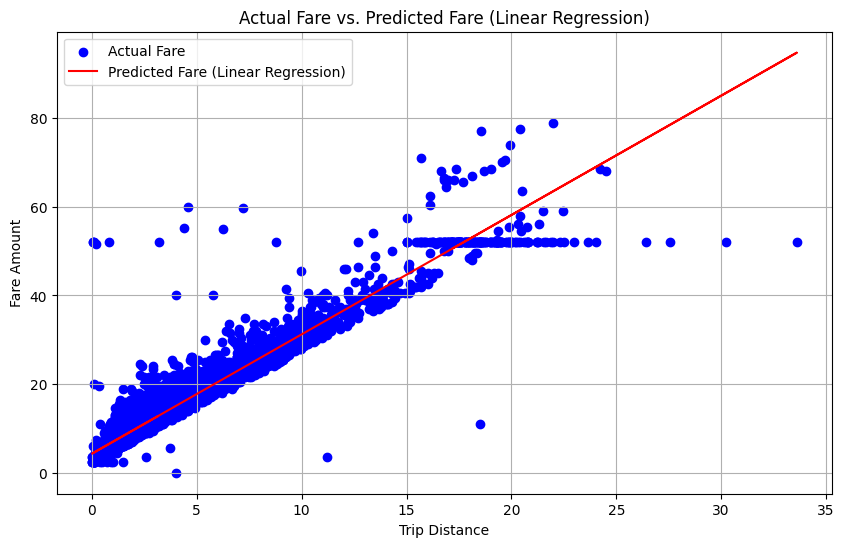


Linear Regression (Tip Amount vs Fare Amount):
Slope: 2.663
Intercept: 7.589
R-squared: 0.365
P-value: 0.000
Standard error of the slope: 0.035


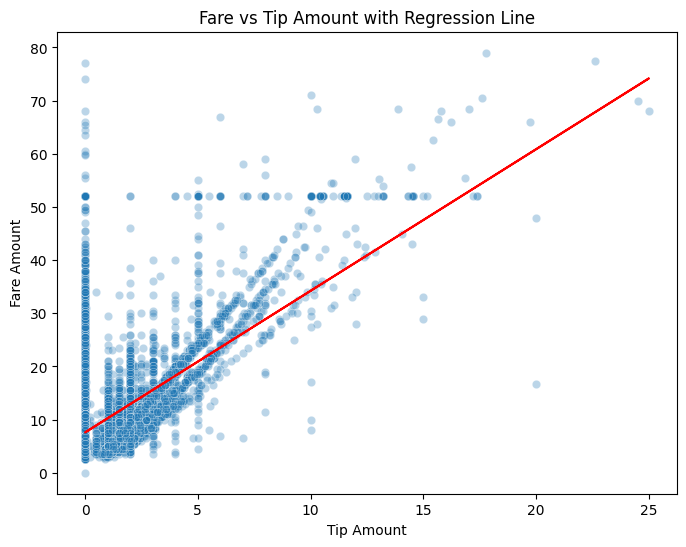

In [48]:
# Ensure x and y are defined for the first linear regression calculation and plot
x = df['trip_distance']
y = df['fare_amount']

# Call linregress for trip_distance vs fare_amount (this part already exists)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
r_squared = r_value**2

print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"R-squared: {r_squared:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Standard error of the slope: {std_err:.3f}")

print("\nInterpretation:")
print(f"- **Slope ({slope:.3f}):** For every one-unit increase in 'trip_distance', the 'fare_amount' is predicted to increase by approximately ${slope:.3f}, on average.")
print(f"- **Intercept ({intercept:.3f}):** When the 'trip_distance' is zero, the predicted 'fare_amount' is approximately ${intercept:.3f}. While a trip distance of zero is possible, this intercept might not have a strong practical interpretation in most real-world scenarios.")
print(f"- **R-squared ({r_squared:.3f}):** Approximately {r_squared*100:.1f}% of the variance in 'fare_amount' can be explained by the linear relationship with 'trip_distance'. This indicates a strong positive linear relationship.")
print(f"- **P-value ({p_value:.3f}):** The very low p-value suggests that the correlation between 'trip_distance' and 'fare_amount' is statistically significant, and the slope is significantly different from zero.")
print(f"- **Standard error of the slope ({std_err:.3f}):** This value estimates the standard deviation of the slope coefficient. It provides a measure of the precision of the estimated slope.")

# Plot actual vs. predicted values for trip_distance vs fare_amount
predicted_fare = slope * x + intercept

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual Fare')
plt.plot(x, predicted_fare, color='red', label='Predicted Fare (Linear Regression)')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Actual Fare vs. Predicted Fare (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

# --- Linear Regression for Tip Amount vs Fare Amount ---

# Correctly define x3 as a Series for scipy.stats.linregress
x3 = df['tip_amount']
y3 = df['fare_amount']

# Use sklearn for linear regression (which expects X to be 2D)
# Note: You already have this model fitting in a previous cell.
# model = LinearRegression()
# model.fit(df[['tip_amount']], y3) # Use df[['tip_amount']] here as it's 2D

# Use scipy.stats.linregress for correlation stats (expects 1D inputs)
slope_tip_fare, intercept_tip_fare, r_value_tip_fare, p_value_tip_fare, std_err_tip_fare = linregress(x3, y3)
r_squared_tip_fare = r_value_tip_fare**2

print("\nLinear Regression (Tip Amount vs Fare Amount):")
print(f"Slope: {slope_tip_fare:.3f}")
print(f"Intercept: {intercept_tip_fare:.3f}")
print(f"R-squared: {r_squared_tip_fare:.3f}")
print(f"P-value: {p_value_tip_fare:.3f}")
print(f"Standard error of the slope: {std_err_tip_fare:.3f}")


# Predict using the sklearn model (assuming it was fitted with df[['tip_amount']])
# If you refit, make sure to use the 2D input:
# model = LinearRegression()
# model.fit(df[['tip_amount']], y3)
# y_pred = model.predict(df[['tip_amount']])

# If you prefer to use the linregress results for plotting the line:
y_pred_linregress = slope_tip_fare * x3 + intercept_tip_fare


plt.figure(figsize=(8,6))
sns.scatterplot(x=df['tip_amount'], y=df['fare_amount'], alpha=0.3) # Swapped x and y to match the regression equation fare_amount = slope * tip_amount + intercept
# Use the predicted values from linregress or sklearn model. Using linregress results here:
plt.plot(x3, y_pred_linregress, color='red')
plt.xlabel('Tip Amount') # Adjusted label
plt.ylabel('Fare Amount') # Adjusted label
plt.title('Fare vs Tip Amount with Regression Line') # Adjusted title
plt.show()